# 概述

pandas的Merge,相当于Sql的join，将不同的表按key关联到一个表 

## merge的语法

pd.merge(left,right,how="inner",on=None,left_on=None,right_index=Fasle,sort=True,suffixes('_x','_y',copy=True,indicator=False,validate=None)

* left,right:要merge的DataFrame,或者有name的Series
* how: join类型，“left,right,outer,inner”,
* on: join的key,left和right都要这个key
* left_on: left的df或者serie的key
* right_on: right的df或者series的key
* left_index,right_index: 使用index而不是普通的column做join
* suffixes:两个元素的后缀，如果有重名自动添加后缀默认是（"_x","_y"）

## 本节纲要
* 1、电影数据集的join实例
* 2、理解merge一对一，一对多，多对多的数量对齐关系
* 3、理解eft join,right join,inner join,uter join的区别
* 4、如果出现非key的字段重名怎么办

# 电影数据级的join实例

In [1]:
import pandas as pd

In [2]:
df_ratings = pd.read_csv("./datas/movielens-1m/ratings.dat",
                         sep="::",
                         engine='python',
                         names="UserID::MovieID::Rating::Timestamp:".split("::")
                        ) 

In [3]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp:
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
df_users = pd.read_csv("./datas/movielens-1m/users.dat",
                         sep="::",
                         engine='python',
                         names="UserID::Gender::Age::Occupation::Zip-code".split("::")
                        ) 

In [5]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
df_movies = pd.read_csv("./datas/movielens-1m/movies.dat",
                         sep="::",
                         engine='python',
                         names="MovieID::Title::Genres".split("::")
                        ) 

In [7]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# 使用UserID作为对应查询，how='inner'，是只有UserID匹配才会留下值
df_ratings_users = pd.merge(df_ratings,df_users,left_on="UserID",right_on="UserID",how="inner")

In [9]:
df_ratings_users.head()

,UserID,MovieID,Rating,Timestamp:,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [10]:
df_ratings_users_movies = pd.merge(df_ratings_users,df_movies,left_on="MovieID",right_on="MovieID",how="inner")

In [12]:
df_ratings_users_movies.head(10)

,UserID,MovieID,Rating,Timestamp:,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


# 理解merge时数量的对齐关系

一下关系要理解：
   * one-to-one:一对一关系，关系的key都是唯一的
        * 比如（学号、姓名）merge（学号、年龄）
        * 结果条数：1*1
   * one-to-many:一对多关系，左边唯一key,右边不唯一
       * 比如（学号，姓名）merge（学号，[语文成绩、数学成绩、英语成绩]）
       * 结果为1*N
   * many-to-many:多对多关系，左边右边都不是唯一的，
       * 比如（学号，[语文成绩、数学成绩、英语成绩]）merge（学号、[篮球、足球、乒乓求]）
       * 结果条数为M*N
    

# 理解join的关系 

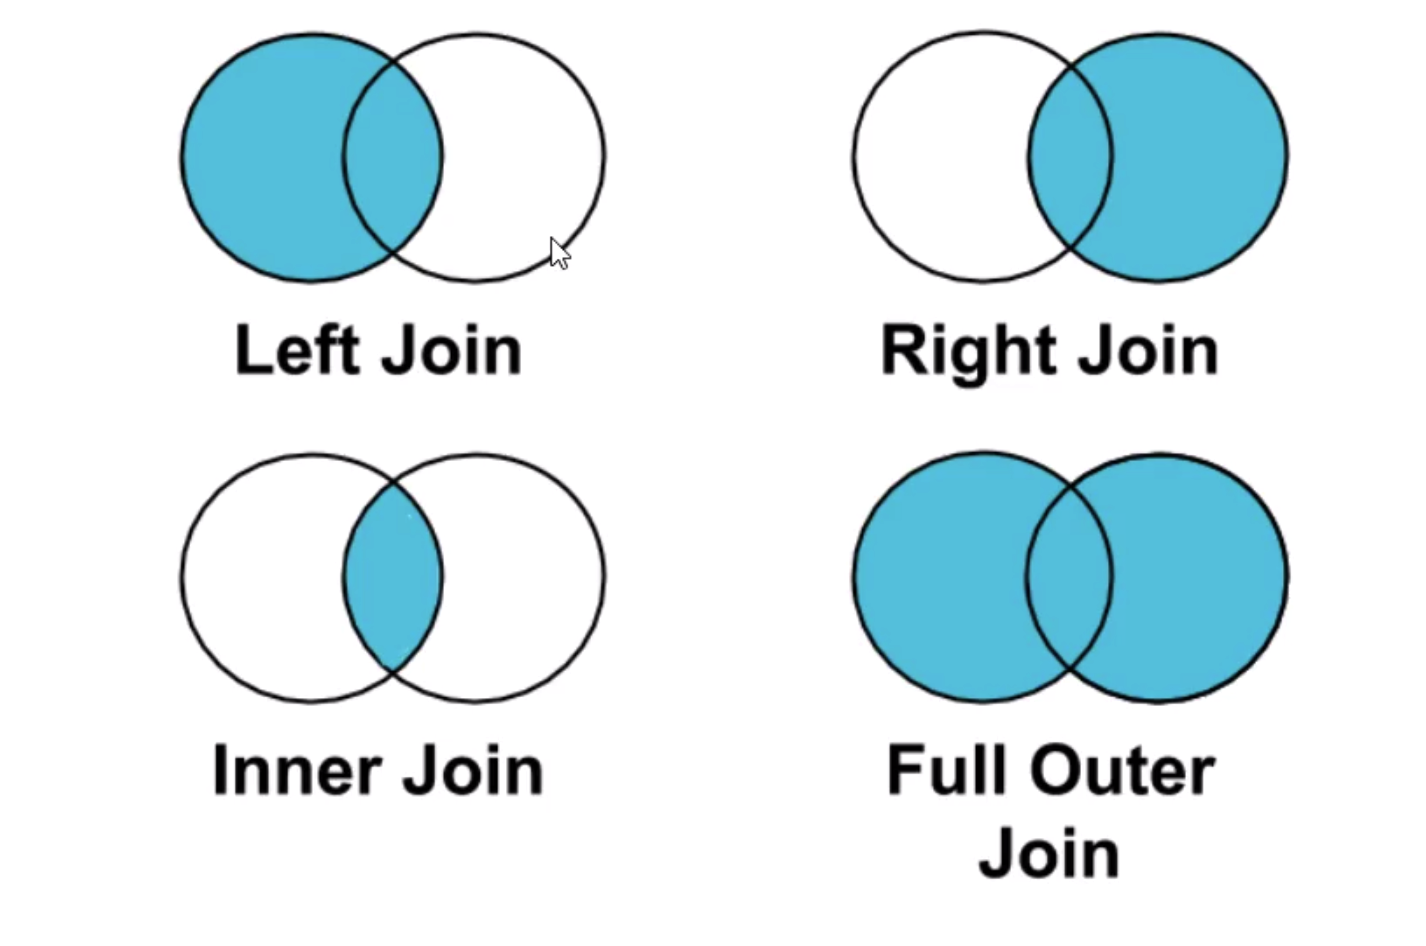

In [13]:
left = pd.DataFrame({
    'key':['K0','K1','K2','K3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
})

right = pd.DataFrame({
    'key':['K0','K1','K4','K5'],
    'C':['C0','C1','C4','C5'],
    'D':['D0','D1','D4','D5']
})

In [14]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [15]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K4,C4,D4
3,K5,C5,D5


## inner join，默认
左边和右边的key都有，才会出现在结果里

In [16]:
pd.merge(left,right,how='inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


## left join
左边的都会出现在结果里，右边的不存在，则为null

In [17]:
pd.merge(left,right,how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN


## right join
右边的都会出现在结果里，左边的不存在，则为null

In [18]:
pd.merge(left,right,how='right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K4,NaN,NaN,C4,D4
3,K5,NaN,NaN,C5,D5


## outer join
两边都会出现在结果里，不存在结果为null

In [20]:
pd.merge(left,right,how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN
4,K4,NaN,NaN,C4,D4
5,K5,NaN,NaN,C5,D5


# 如果出现非Key的字段重名怎么办

In [21]:
left = pd.DataFrame({
    'key':['K0','K1','K2','K3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
})

right = pd.DataFrame({
    'key':['K0','K1','K4','K5'],
    'A':['A10','A11','A12','A13'],
    'D':['D0','D1','D4','D5']
})

In [22]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [23]:
right

,key,A,D
0,K0,A10,D0
1,K1,A11,D1
2,K4,A12,D4
3,K5,A13,D5


In [24]:
pd.merge(left,right,on='key')

,key,A_x,B,A_y,D
0,K0,A0,B0,A10,D0
1,K1,A1,B1,A11,D1


In [25]:
pd.merge(left,right,on='key',suffixes=('_left','_right'))

,key,A_left,B,A_right,D
0,K0,A0,B0,A10,D0
1,K1,A1,B1,A11,D1
